# 3.3 腫瘍数

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import warnings

sns.set_theme()
warnings.simplefilter("ignore")

In [2]:
y_A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
y_B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

In [3]:
print("A系統のデータの要約統計量")
print(stats.describe(y_A))
print()
print("B系統のデータの要約統計量")
print(stats.describe(y_B))

A系統のデータの要約統計量
DescribeResult(nobs=10, minmax=(6, 15), mean=11.7, variance=9.344444444444445, skewness=-0.6848989298454216, kurtosis=-0.784392624713516)

B系統のデータの要約統計量
DescribeResult(nobs=13, minmax=(6, 11), mean=8.692307692307692, variance=2.3974358974358974, skewness=-0.024886573315266888, kurtosis=-0.9230890217049392)


## a

In [4]:
def summarise_poisson_gamma(a, b, y, print_results=False):
    # 結果を保存する辞書
    results_dict = {}

    # 事後分布のパラメータ
    a_posterior = a + np.sum(y)
    b_posterior = b + len(y)
    results_dict["a_posterior"] = a_posterior
    results_dict["b_posterior"] = b_posterior

    # 事後平均
    posterior_mean = a_posterior / b_posterior
    results_dict["posterior_mean"] = posterior_mean

    # 事後分散
    posterior_var = a_posterior / (b_posterior**2)
    results_dict["posterior_var"] = posterior_var

    # 信用区間
    credible_interval = stats.gamma.interval(
        confidence=0.95, a=a_posterior, scale=1 / b_posterior
    )
    results_dict["credible_interval"] = credible_interval

    if print_results:
        print(
            "Posterior Distributiion:\n",
            f"\tgamma({a_posterior}, {b_posterior})",
            end="\n",
        )
        print("Posterior Mean:\n", f"\t {posterior_mean}", end="\n")
        print("Posterior Variance:\n", f"\t {posterior_var}", end="\n")
        print("95% Credible Interval:\n", f"\t {credible_interval}", end="\n")

    return results_dict

In [5]:
results_A = summarise_poisson_gamma(
    a=120,
    b=10,
    y=y_A,
    print_results=True,
)

Posterior Distributiion:
 	gamma(237, 20)
Posterior Mean:
 	 11.85
Posterior Variance:
 	 0.5925
95% Credible Interval:
 	 (10.389238190941795, 13.405448325642006)


In [6]:
results_B = summarise_poisson_gamma(
    a=12,
    b=1,
    y=y_B,
    print_results=True,
)

Posterior Distributiion:
 	gamma(125, 14)
Posterior Mean:
 	 8.928571428571429
Posterior Variance:
 	 0.6377551020408163
95% Credible Interval:
 	 (7.432064219464302, 10.560308149242363)


## b

In [7]:
df_3_3 = pd.DataFrame()

df_3_3["n0"] = np.arange(1, 50 + 1)
df_3_3["a"] = df_3_3["n0"].mul(12)
df_3_3["b"] = df_3_3["n0"]

df_3_3["posterior_mean"] = df_3_3.apply(
    lambda row: summarise_poisson_gamma(a=row["a"], b=row["b"], y=y_B)[
        "posterior_mean"
    ],
    axis=1,
)

df_3_3.head()

,n0,a,b,posterior_mean
0,1,12,1,8.928571
1,2,24,2,9.133333
2,3,36,3,9.312500
3,4,48,4,9.470588
4,5,60,5,9.611111


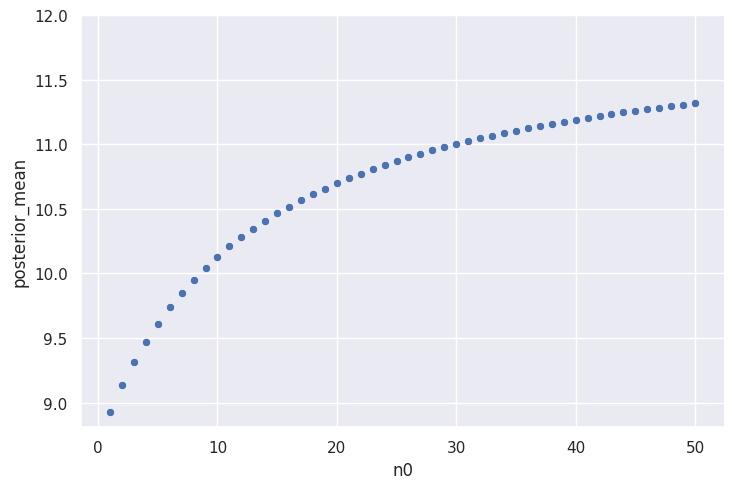

In [8]:
_ = sns.relplot(
    df_3_3,
    x="n0",
    y="posterior_mean",
    aspect=1.5,
).set(ylim=(None, 12.0))

$\theta_B$ の事後期待値が $\theta_A$ の事後期待値 (= 11.85) に近い値をとるためには、大きい $n_0$ をとる必要がある。
つまり、$\theta_B = 12$ であるという強い信念が必要となる。

## c

TBW